In [1]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import torch.nn as nn
import sklearn.metrics.pairwise as pw
import numpy as np
from resNet18LinEval import ResNet_18, ResNet_18_linEval


In [2]:
device = 'cpu'
t2np = lambda t: t.detach().cpu().numpy()



In [3]:
dataset = torch.load('datasets/Test_dataSet.pt')
X = dataset.tensors[0]
y = dataset.tensors[1]

In [4]:
latent_size = 512
model = ResNet_18(1,18)
model.load_state_dict(torch.load(f'models/bestSupervised.pth'))
model.to(device)


y_pred = model(X.view(-1,1,128,32))

In [5]:
_, preds = torch.max(y_pred.data, 1)

In [6]:
classNames = ['Myotis daubentonii', 'Plecotus auritus', 'Pipistrellus pipistrellus' , #'Bat',
 'Nyctalus leisleri' ,'Pipistrellus pygmaeus', 'Myotis mystacinus',
 'Myotis nattereri', 'Pipistrellus nathusii', 'Nyctalus noctula',
 'Eptesicus serotinus', 'Barbastellus barbastellus', 'Myotis brandtii',
 'Myotis alcathoe' ,'Myotis bechsteinii', 'Plecotus austriacus',
 'Rhinolophus ferrumequinum', 'Rhinolophus hipposideros', 'noise']


In [7]:
classesDic = {
    'Myotis daubentonii': 0,
    'Plecotus auritus': 1,
    'Pipistrellus pipistrellus': 2,
    # 'Bat': 3,
    'Nyctalus leisleri': 3,
    'Pipistrellus pygmaeus': 4,
    'Myotis mystacinus': 5,
    'Myotis nattereri': 6,
    'Pipistrellus nathusii': 7,
    'Nyctalus noctula': 8,
    'Eptesicus serotinus': 9,
    'Barbastellus barbastellus': 10,
    'Myotis brandtii': 11,
    'Myotis alcathoe': 12,
    'Myotis bechsteinii': 13,
    'Plecotus austriacus': 14,
    'Rhinolophus ferrumequinum': 15,
    'Rhinolophus hipposideros': 16,
    'noise':17
 }

In [8]:
desired_order = []
for i in sorted(classNames):
    desired_order.append(classesDic[i])

In [9]:
desired_order

[10, 9, 12, 13, 11, 0, 5, 6, 3, 8, 7, 2, 4, 1, 14, 15, 16, 17]

In [10]:
len(classNames)

18

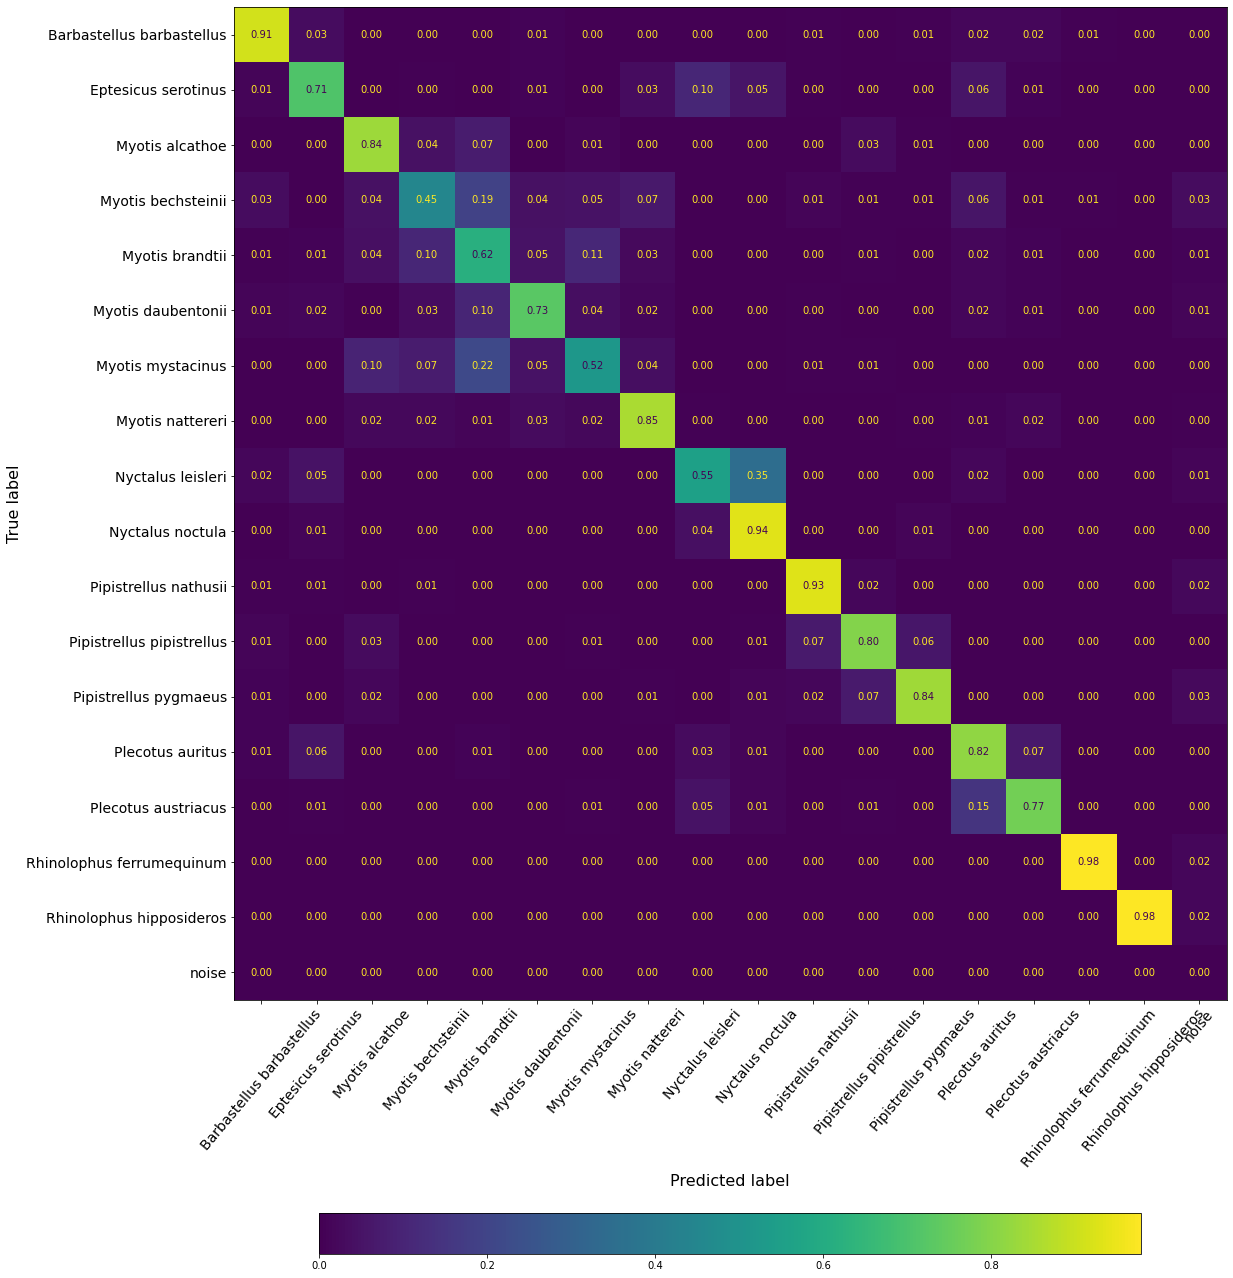

In [11]:
cm = confusion_matrix(y, t2np(preds), normalize='true') 

desired_order = [10, 9, 12, 13, 11, 0, 5, 6, 3, 8, 7, 2, 4, 1, 14, 15, 16, 17]

fig, ax = plt.subplots(figsize=(20, 20))

# Plot the confusion matrix without color bar

cm = cm[desired_order, :]
cm = cm[:, desired_order]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(classNames))

cax = disp.plot(xticks_rotation=50, ax=ax, cmap='viridis', colorbar=False)


# Customize the text to display at most 2 decimal places
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        disp.text_[i, j].set_text(f'{cm[i, j]:.2f}')
        
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_xlabel('Predicted label', fontsize=16)
ax.set_ylabel('True label', fontsize=16)

# Add the color bar at the bottom
cbar = plt.colorbar(cax.im_, ax=ax, shrink=0.6, orientation='horizontal')
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
fig.savefig('confu_simCLR.png', dpi = 300)

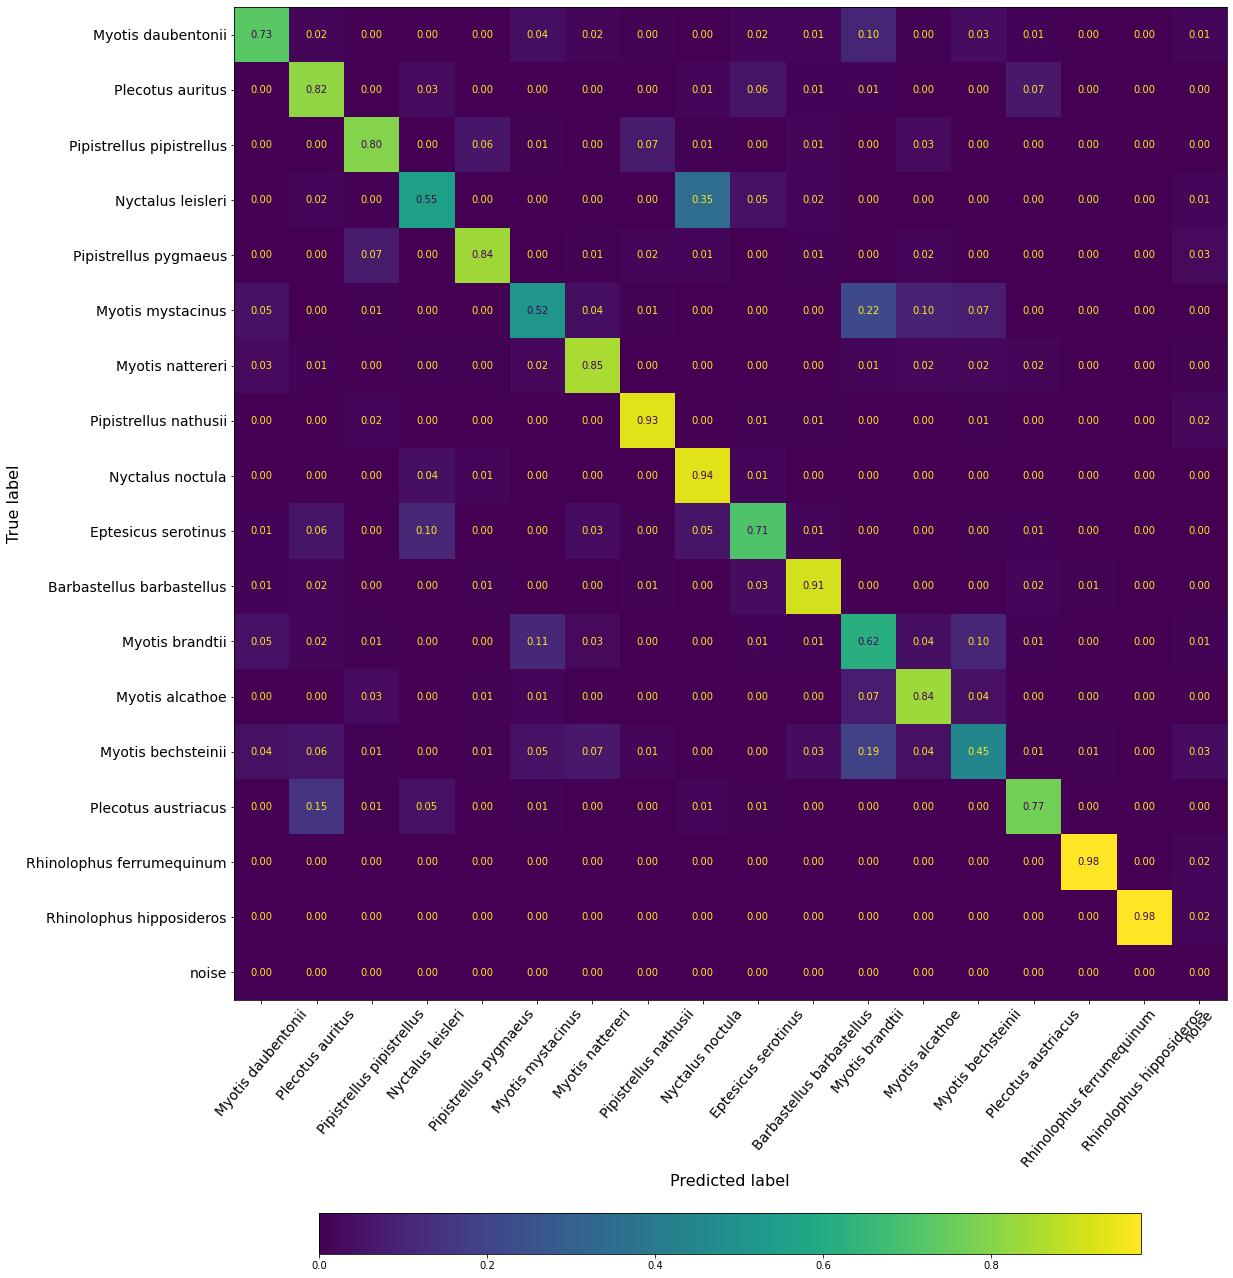

In [13]:
cm = confusion_matrix(y, t2np(preds), normalize='true') 

fig, ax = plt.subplots(figsize=(20, 20))

# Plot the confusion matrix without color bar

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=(classNames))

cax = disp.plot(xticks_rotation=50, ax=ax, cmap='viridis', colorbar=False)


# Customize the text to display at most 2 decimal places
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        disp.text_[i, j].set_text(f'{cm[i, j]:.2f}')
        
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_xlabel('Predicted label', fontsize=16)
ax.set_ylabel('True label', fontsize=16)

# Add the color bar at the bottom
cbar = plt.colorbar(cax.im_, ax=ax, shrink=0.6, orientation='horizontal')
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
fig.savefig('confu_simCLR.png', dpi = 300)

In [ ]:
cm = confusion_matrix(y, t2np(preds), normalize='true') 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(classNames))

fig, ax = plt.subplots(figsize=(20, 20))

# Plot the confusion matrix without color bar
cax = disp.plot(xticks_rotation=50, ax=ax, cmap='viridis', colorbar=False)

cm = cm[desired_order, :]
cm = cm[:, desired_order]

# Customize the text to display at most 2 decimal places
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        disp.text_[i, j].set_text(f'{cm[i, j]:.2f}')
        
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_xlabel('Predicted label', fontsize=16)
ax.set_ylabel('True label', fontsize=16)

# Add the color bar at the bottom
cbar = plt.colorbar(cax.im_, ax=ax, shrink=0.6, orientation='horizontal')
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
fig.savefig('confu_simCLR.png', dpi = 300)

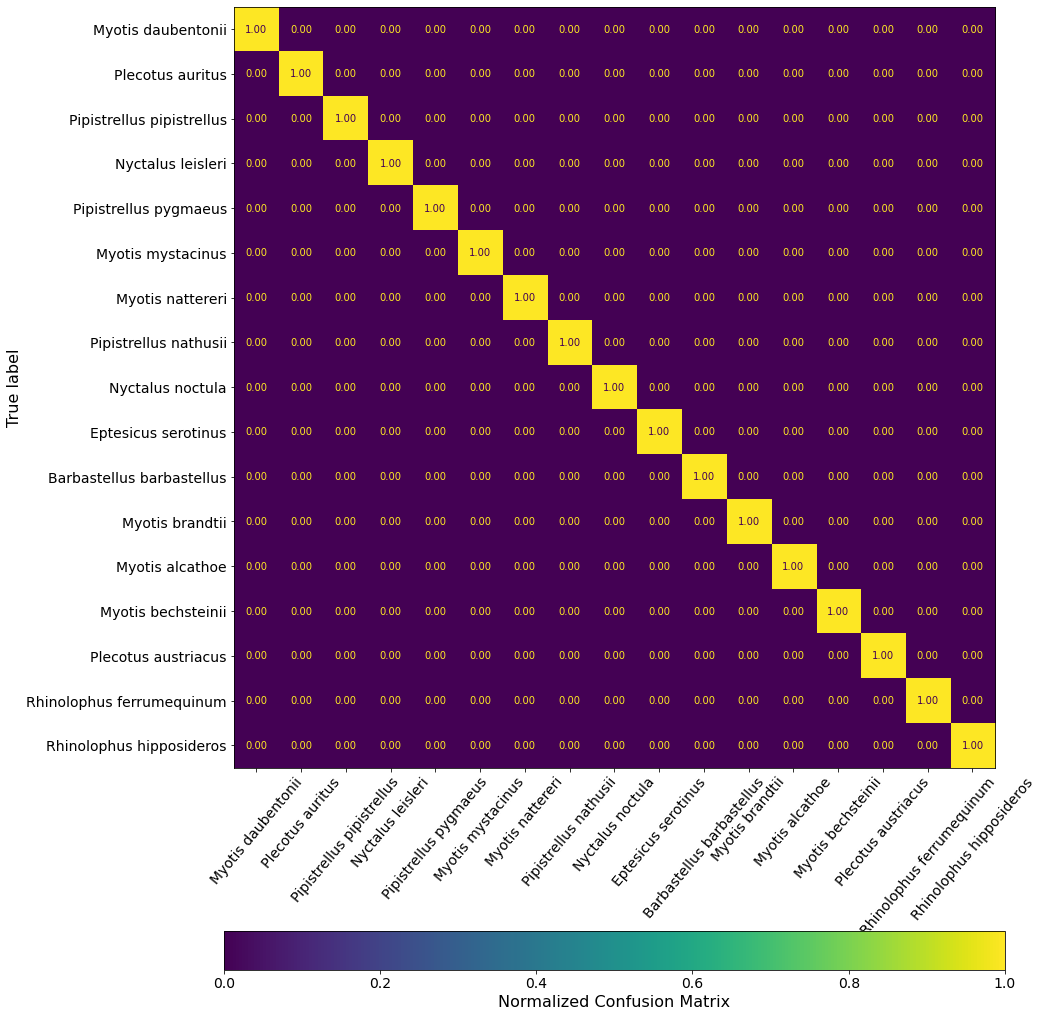

In [21]:
cm = cm.round(3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classNames)

fig, ax = plt.subplots(figsize=(20, 20))

# Plot the confusion matrix without color bar
cax = disp.plot(xticks_rotation=50, ax=ax, cmap='viridis', colorbar=False)

# Customize the text to display at most 2 decimal places
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        disp.text_[i, j].set_text(f'{cm[i, j]:.2f}')

# Increase the label and tick size
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_xlabel('Predicted label', fontsize=16)
ax.set_ylabel('True label', fontsize=16)

# Add the color bar at the bottom with custom size and padding
cbar = plt.colorbar(cax.im_, ax=ax, orientation='horizontal', shrink=0.7, pad=0.15)
cbar.ax.tick_params(labelsize=14)
cbar.set_label("Normalized Confusion Matrix", fontsize=16)
